In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.vector_ar.var_model import VAR


In [2]:
df_var = pd.read_csv('zillow-carlifornia.csv', parse_dates=True, squeeze=True)
df_var.head()

,Date,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate,MedianRentalPrice_AllHomes.California
0,2004-01-31,326752.55,5.02,7.9,NaN
1,2004-02-29,329501.50,4.94,7.8,NaN
2,2004-03-31,340125.45,4.74,7.8,NaN
3,2004-04-30,355329.50,5.16,7.5,NaN
4,2004-05-31,367818.15,5.64,7.3,NaN


In [3]:
# Dropping columns MedianRentalPrice_AllHomes.California and Date.
# dropped column MedianRentalPrice_AllHomes.California due to a lot of missing values.

df_var = df_var.drop(columns = ['MedianRentalPrice_AllHomes.California', 'Date'])
df_var.head()

,MedianSoldPrice_AllHomes.California,MedianMortageRate,UnemploymentRate
0,326752.55,5.02,7.9
1,329501.50,4.94,7.8
2,340125.45,4.74,7.8
3,355329.50,5.16,7.5
4,367818.15,5.64,7.3


In [9]:
# Renaming the columns of the dataframe.

df_var.columns = ['MedianSoldPrice', 'MedianMortageRate', 'UnemploymentRate']
df_var.head()

,MedianSoldPrice,MedianMortageRate,UnemploymentRate
0,326752.55,5.02,7.9
1,329501.50,4.94,7.8
2,340125.45,4.74,7.8
3,355329.50,5.16,7.5
4,367818.15,5.64,7.3


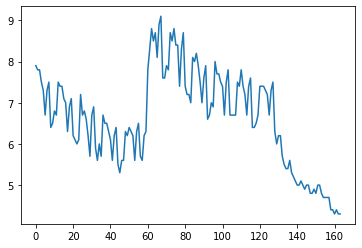

In [10]:
# Line-plot of the unemployment rate

UnemploymentRate=df_var.UnemploymentRate
pyplot.plot(UnemploymentRate)
pyplot.show()

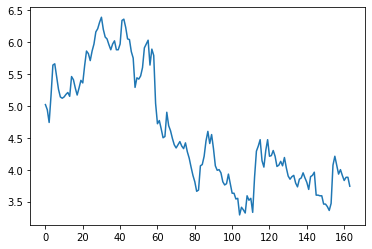

In [11]:
# Line-plot of the median mortgage price

MedianMortageRate=df_var.MedianMortageRate
pyplot.plot(MedianMortageRate)
pyplot.show()

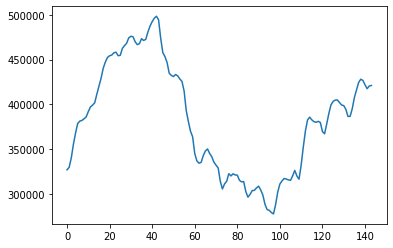

In [12]:
# Line-plot of the median sold price

MedianSoldPrice=df_var.MedianSoldPrice
pyplot.plot(MedianSoldPrice)
pyplot.show()

# Var Model: MedianSoldPrice vs. MedianMortgageRate

### Fitting VAR model to predict MedianSoldPrice with respect to MedianMortgageRate



In [27]:
# Dropping the column 'UnemploymentRate' to create a new dataframe.
# Dividing into train and test set.

df_var_price_mortgage = df_var.drop(columns = ['UnemploymentRate'])[:144]
train = df_var_price_mortgage[:int(0.75*(len(df_var_price_mortgage)))]
test = df_var_price_mortgage[int(0.75*(len(df_var_price_mortgage))):]
train.head()

,MedianSoldPrice,MedianMortageRate
0,326752.55,5.02
1,329501.50,4.94
2,340125.45,4.74
3,355329.50,5.16
4,367818.15,5.64


In [28]:
# Fitting an AR(1) process
    
var_model1 = VAR(endog=train)
var_model1_fit = var_model1.fit(1)
print(var_model1_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:28:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.3703
Nobs:                     107.000    HQIC:                   14.2812
Log likelihood:          -1058.45    FPE:                1.49923e+06
AIC:                      14.2204    Det(Omega_mle):     1.41857e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     3459.301759      4050.322252            0.854           0.393
L1.MedianSoldPrice           1.023720         0.024570           41.666           0.000
L1.MedianMortageRate  

In [29]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model1_fit.forecast(var_model1_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])


for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [33]:
# Calculating the rmse on the validation data for AR(1)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


32122.98


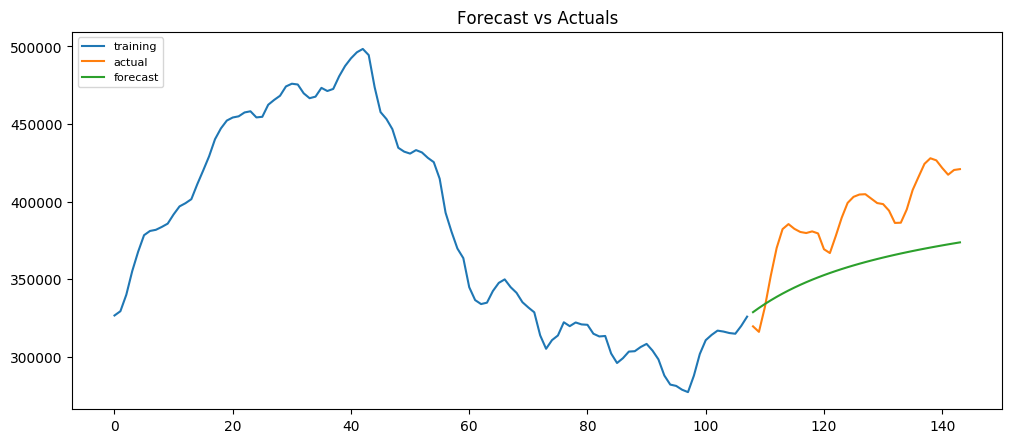

In [34]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [35]:
# Fitting an AR(2) process
    
var_model2 = VAR(endog=train)
var_model2_fit = var_model2.fit(2)
print(var_model2_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:29:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.8614
Nobs:                     106.000    HQIC:                   13.7120
Log likelihood:          -1012.15    FPE:                    814493.
AIC:                      13.6102    Det(Omega_mle):         742768.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     4421.520569      3000.020890            1.474           0.141
L1.MedianSoldPrice           1.660193         0.075275           22.055           0.000
L1.MedianMortageRate  

In [36]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model2_fit.forecast(var_model2_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [37]:
# Calculating the rmse on the validation data for AR(2)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


14090.08


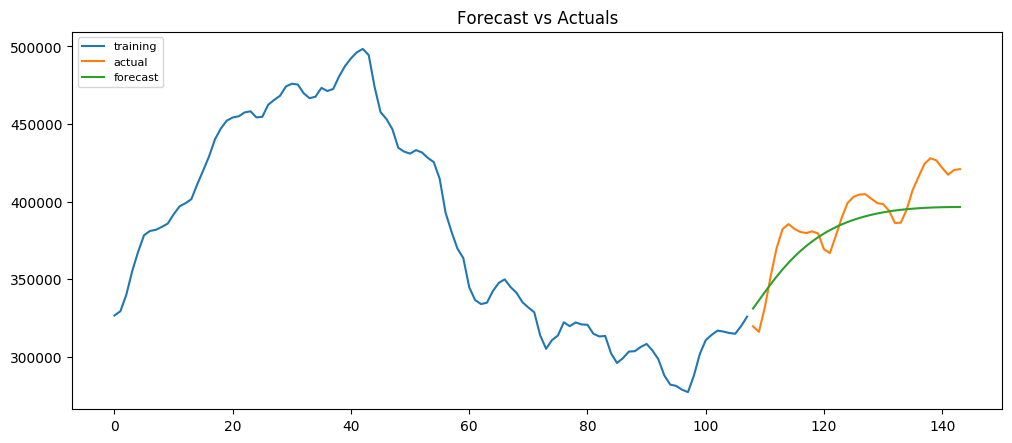

In [38]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [39]:
# Fitting an AR(3) process
    
var_model3 = VAR(endog=train)
var_model3_fit = var_model3.fit(3)
print(var_model3_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:29:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.9842
Nobs:                     105.000    HQIC:                   13.7737
Log likelihood:          -999.571    FPE:                    831305.
AIC:                      13.6304    Det(Omega_mle):         730639.
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                     3233.609250      3034.525954            1.066           0.287
L1.MedianSoldPrice           1.738195         0.102431           16.969           0.000
L1.MedianMortageRate  

In [41]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model3_fit.forecast(var_model3_fit.y, steps=len(test))
cols = df_var_price_mortgage.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]


In [42]:
# Calculating the rmse on the validation data for AR(3)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


21090.75


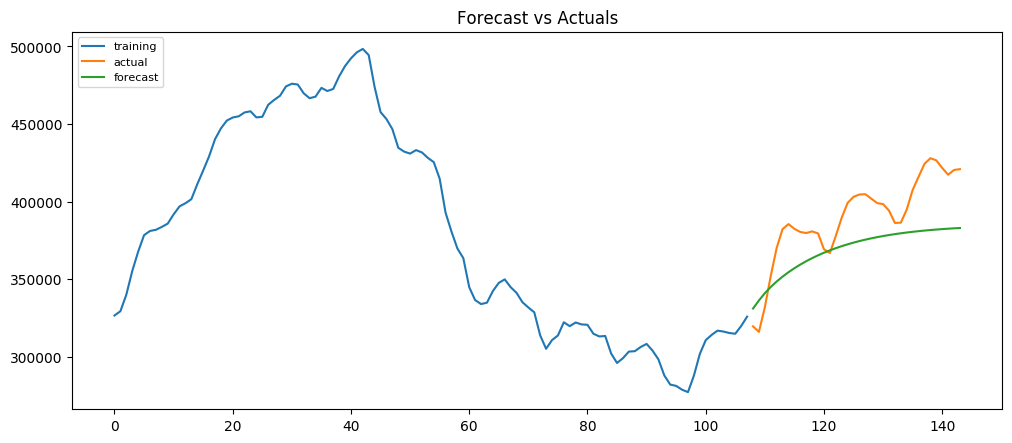

In [43]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Var Model: MedianSoldPrice vs. UnemploymentRate

### Fitting VAR model to predict MedianSoldPrice with respect to UnemploymentRate



In [44]:
# Dropping the column 'MedianMortageRate' to create a new dataframe.
# Dividing into train and test set.

df_var_price_unemployment = df_var.drop(columns = ['MedianMortageRate'])[:144]
train = df_var_price_unemployment[:int(0.75*(len(df_var_price_unemployment)))]
test = df_var_price_unemployment[int(0.75*(len(df_var_price_unemployment))):]
train.head()

,MedianSoldPrice,UnemploymentRate
0,326752.55,7.9
1,329501.50,7.8
2,340125.45,7.8
3,355329.50,7.5
4,367818.15,7.3


In [45]:
# Fitting an AR(1) process
    
var_model1 = VAR(endog=train)
var_model1_fit = var_model1.fit(1)
print(var_model1_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:30:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.5243
Nobs:                     107.000    HQIC:                   16.4352
Log likelihood:          -1173.68    FPE:                1.29217e+07
AIC:                      16.3744    Det(Omega_mle):     1.22265e+07
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                  -27127.862476     11457.297487           -2.368           0.018
L1.MedianSoldPrice          1.020443         0.013691           74.535           0.000
L1.UnemploymentRate      2

In [46]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model1_fit.forecast(var_model1_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]


/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [47]:
# Calculating the rmse on the validation data for AR(1)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


58081.31


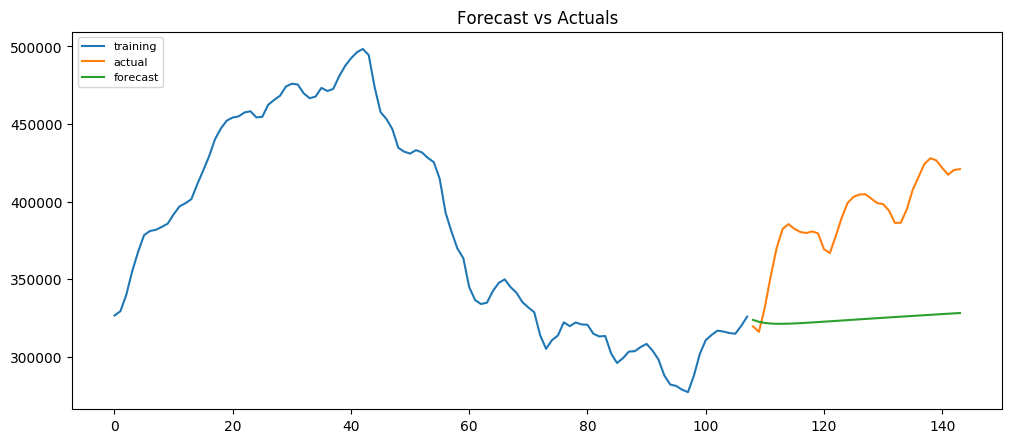

In [48]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [49]:
# Fitting an AR(2) process
    
var_model2 = VAR(endog=train)
var_model2_fit = var_model2.fit(2)
print(var_model2_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:30:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.0981
Nobs:                     106.000    HQIC:                   15.9487
Log likelihood:          -1130.70    FPE:                7.62534e+06
AIC:                      15.8468    Det(Omega_mle):     6.95385e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                   -8883.451535      9784.324093           -0.908           0.364
L1.MedianSoldPrice          1.665293         0.073611           22.623           0.000
L1.UnemploymentRate       

In [50]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model2_fit.forecast(var_model2_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [51]:
# Calculating the rmse on the validation data for AR(2)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


39161.22


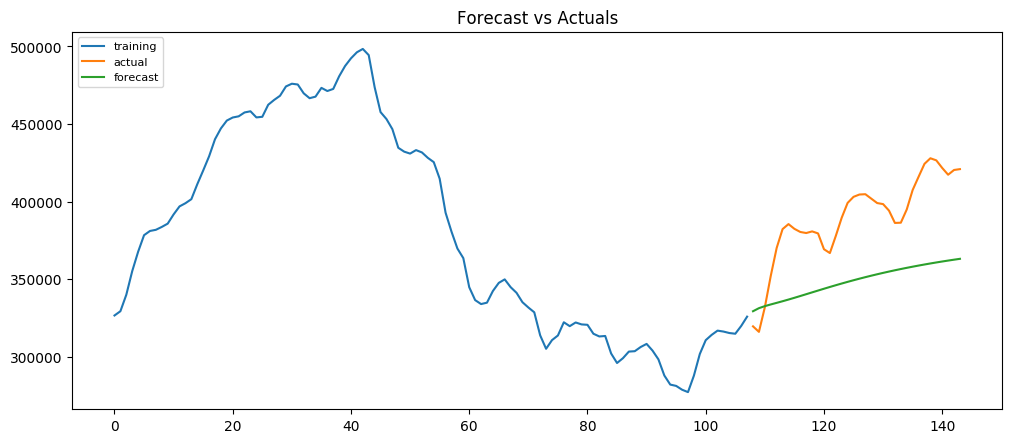

In [52]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [53]:
# Fitting an AR(3) process
    
var_model3 = VAR(endog=train)
var_model3_fit = var_model3.fit(3)
print(var_model3_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, Dec, 2019
Time:                     21:30:43
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    16.2086
Nobs:                     105.000    HQIC:                   15.9982
Log likelihood:          -1116.35    FPE:                7.68797e+06
AIC:                      15.8548    Det(Omega_mle):     6.75701e+06
--------------------------------------------------------------------
Results for equation MedianSoldPrice
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                  -13429.556473     10847.537593           -1.238           0.216
L1.MedianSoldPrice          1.741758         0.099216           17.555           0.000
L1.UnemploymentRate       

In [54]:
# Predicting the MedianSoldPrice of the test sample.

fc = var_model3_fit.forecast(var_model3_fit.y, steps=len(test))
cols = df_var_price_unemployment.columns
pred = pd.DataFrame(index=test.index,columns=[cols])

for j in range(0,2):
    for i in range(0, len(fc)):
        pred.iloc[i][j] = fc[i][j]

/usr/local/lib/python3.7/site-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [55]:
# Calculating the rmse on the validation data for AR(3)

diff = (pred['MedianSoldPrice'].squeeze().iloc[:21] - test['MedianSoldPrice'].squeeze().iloc[:21])
mse = (diff ** 2).mean()
rmse = round(np.sqrt(mse), 2)
print(rmse)


55458.93


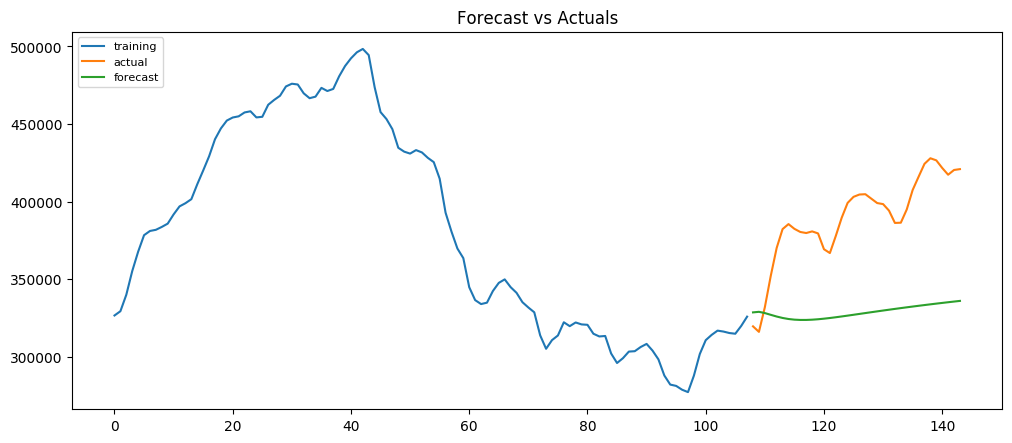

In [56]:
# Plotting the actual vs. forecast

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.MedianSoldPrice, label='training')
plt.plot(test.MedianSoldPrice, label='actual')
plt.plot(pred.MedianSoldPrice, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()